In [11]:
import pandas as pd
import numpy as np
from scipy import stats as sp
import sys, os
sys.path.append('../')
from lib import trace_analysis
from lib import plots_analysis
from lib import trace_statistics
from lib import trace_classification
import csv
import warnings 
warnings.filterwarnings('ignore')

# Data Preparation


Prepare the data to be used with kNN

In [12]:
plots = set()
with open('traces/traces.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
            continue
        else:
            plots.add((row[1], row[2]))

plots = list(plots)  

stats = None
win_25_stats = None
win_50_stats = None
win_100_stats = None

for row in plots:
    label = 'Normal'
    experiment = row[1]
    
    # Assign a label
    if row[1].find('gh') >= 0:
        label = 'Gray Hole'
    elif row[1].find('bh') >= 0:
        label = 'Black Hole'
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    
    # Update stats
    if stats is None:
        stats = trace_statistics.compute_labeled_statistics(nodes, packets_node, label, experiment)
        win_25_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 25)
        win_50_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 50)
        win_100_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 100)
    else:
        stats = pd.concat([stats, trace_statistics.compute_labeled_statistics(nodes, packets_node, label, experiment)])
        win_25_stats = pd.concat([win_25_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 25)])
        win_50_stats = pd.concat([win_50_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 50)])
        win_100_stats = pd.concat([win_100_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 100)])
        
stats = stats.reset_index(drop=True)
win_25_stats = win_25_stats.reset_index(drop=True)
win_50_stats = win_50_stats.reset_index(drop=True)
win_100_stats = win_100_stats.reset_index(drop=True)

# Create a dictionary containing all the statistics for each trace size
trace_stats = {200: stats, 25: win_25_stats, 50: win_50_stats, 100: win_100_stats}
stats.head(5)

,node_id,experiment,count,mean,var,std,hop,min,max,loss,outliers,label
0,aaaa::212:7404:4:404:,grid_1gh-9_2019-02-15_19:19_,186,102.369355,5317.077813,72.918295,2,52.7,582.0,0.070,6,Gray Hole
1,aaaa::212:7405:5:505:,grid_1gh-9_2019-02-15_19:19_,109,179.700000,7535.613519,86.807912,3,83.1,522.0,0.455,5,Gray Hole
2,aaaa::212:7402:2:202:,grid_1gh-9_2019-02-15_19:19_,120,117.465000,5047.521118,71.045909,2,48.4,374.0,0.400,6,Gray Hole
3,aaaa::212:740a:a:a0a:,grid_1gh-9_2019-02-15_19:19_,99,215.575758,7842.838590,88.559802,4,143.0,611.0,0.505,5,Gray Hole
4,aaaa::212:7409:9:909:,grid_1gh-9_2019-02-15_19:19_,171,201.941520,8513.949501,92.271065,3,112.0,694.0,0.145,11,Gray Hole


Split topologies

In [13]:
rnd1 = []
rnd2 = []
plot = []
for trace in plots:
    if trace[0].find('rnd-1') >= 0:
        rnd1.append(trace)
    elif trace[0].find('rnd-2') >= 0:
        rnd2.append(trace)
    else:
        plot.append(trace)
        

        
plot_stats = None
plot_win_25_stats = None
plot_win_50_stats = None
plot_win_100_stats = None
for row in plot:
    label = 'Normal'
    experiment = row[1]
    
    # Assign a label
    if row[1].find('gh') >= 0:
        label = 'Gray Hole'
    elif row[1].find('bh') >= 0:
        label = 'Black Hole'
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    
    # Update stats
    if stats is None:
        plot_stats = trace_statistics.compute_labeled_statistics(nodes, packets_node, label, experiment)
        plot_win_25_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 25)
        win_50_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 50)
        plot_win_100_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 100)
    else:
        plot_stats = pd.concat([plot_stats, trace_statistics.compute_labeled_statistics(nodes, packets_node, label, experiment)])
        plot_win_25_stats = pd.concat([plot_win_25_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 25)])
        plot_win_50_stats = pd.concat([plot_win_50_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 50)])
        plot_win_100_stats = pd.concat([plot_win_100_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 100)])
        
plot_stats = plot_stats.reset_index(drop=True)
plot_win_25_stats = plot_win_25_stats.reset_index(drop=True)
plot_win_50_stats = plot_win_50_stats.reset_index(drop=True)
plot_win_100_stats = plot_win_100_stats.reset_index(drop=True)

# Create a dictionary containing all the statistics for each trace size
plot_trace_stats = {200: plot_stats, 25: plot_win_25_stats, 50: plot_win_50_stats, 100: plot_win_100_stats}
plot_stats.head(5)

,node_id,experiment,count,mean,var,std,hop,min,max,loss,outliers,label
0,aaaa::212:7404:4:404:,grid_1gh-9_2019-02-15_19:19_,186,102.369355,5317.077813,72.918295,2,52.7,582.0,0.070,6,Gray Hole
1,aaaa::212:7405:5:505:,grid_1gh-9_2019-02-15_19:19_,109,179.700000,7535.613519,86.807912,3,83.1,522.0,0.455,5,Gray Hole
2,aaaa::212:7402:2:202:,grid_1gh-9_2019-02-15_19:19_,120,117.465000,5047.521118,71.045909,2,48.4,374.0,0.400,6,Gray Hole
3,aaaa::212:740a:a:a0a:,grid_1gh-9_2019-02-15_19:19_,99,215.575758,7842.838590,88.559802,4,143.0,611.0,0.505,5,Gray Hole
4,aaaa::212:7409:9:909:,grid_1gh-9_2019-02-15_19:19_,171,201.941520,8513.949501,92.271065,3,112.0,694.0,0.145,11,Gray Hole


In [14]:
rnd1_stats = None
rnd1_win_25_stats = None
rnd1_win_50_stats = None
rnd1_win_100_stats = None
for row in rnd1:
    label = 'Normal'
    experiment = row[1]
    
    # Assign a label
    if row[1].find('gh') >= 0:
        label = 'Gray Hole'
    elif row[1].find('bh') >= 0:
        label = 'Black Hole'
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    
    # Update stats
    if stats is None:
        rnd1_stats = trace_statistics.compute_labeled_statistics(nodes, packets_node, label, experiment)
        rnd1_win_25_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 25)
        rnd1_win_50_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 50)
        rnd1_win_100_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 100)
    else:
        rnd1_stats = pd.concat([rnd1_stats, trace_statistics.compute_labeled_statistics(nodes, packets_node, label, experiment)])
        rnd1_win_25_stats = pd.concat([rnd1_win_25_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 25)])
        rnd1_win_50_stats = pd.concat([rnd1_win_50_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 50)])
        rnd1_win_100_stats = pd.concat([rnd1_win_100_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 100)])
        
rnd1_stats = rnd1_stats.reset_index(drop=True)
rnd1_win_25_stats = rnd1_win_25_stats.reset_index(drop=True)
rnd1_win_50_stats = rnd1_win_50_stats.reset_index(drop=True)
rnd1_win_100_stats = rnd1_win_100_stats.reset_index(drop=True)

# Create a dictionary containing all the statistics for each trace size
rnd1_trace_stats = {200: rnd1_stats, 25: rnd1_win_25_stats, 50: rnd1_win_50_stats, 100: rnd1_win_100_stats}
rnd1_stats.head(5)

,node_id,experiment,count,mean,var,std,hop,min,max,loss,outliers,label
0,aaaa::212:7405:5:505:,rnd_normal_2019-02-14_13:37_,165,166.139394,4757.486548,68.974536,2,101.0,527.0,0.175,8,Normal
1,aaaa::212:7404:4:404:,rnd_normal_2019-02-14_13:37_,170,166.736471,3400.864106,58.316928,2,99.2,601.0,0.150,7,Normal
2,aaaa::212:7408:8:808:,rnd_normal_2019-02-14_13:37_,192,172.661458,5004.591596,70.743138,2,103.0,582.0,0.040,8,Normal
3,aaaa::212:7403:3:303:,rnd_normal_2019-02-14_13:37_,196,255.341837,6249.662036,79.054804,3,146.0,566.0,0.020,8,Normal
4,aaaa::212:7409:9:909:,rnd_normal_2019-02-14_13:37_,173,83.891329,2929.603936,54.125816,1,39.1,438.0,0.135,10,Normal


In [15]:
rnd2_stats = None
rnd2_win_25_stats = None
rnd2_win_50_stats = None
rnd2_win_100_stats = None
for row in rnd2:
    label = 'Normal'
    experiment = row[1]
    
    # Assign a label
    if row[1].find('gh') >= 0:
        label = 'Gray Hole'
    elif row[1].find('bh') >= 0:
        label = 'Black Hole'
    nodes, packets_node = trace_analysis.process_cooja2_traces(row[0], row[1])
    
    # Update stats
    if stats is None:
        rnd2_stats = trace_statistics.compute_labeled_statistics(nodes, packets_node, label, experiment)
        rnd2_win_25_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 25)
        rnd2_win_50_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 50)
        rnd2_win_100_stats = trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 100)
    else:
        rnd2_stats = pd.concat([rnd2_stats, trace_statistics.compute_labeled_statistics(nodes, packets_node, label, experiment)])
        rnd2_win_25_stats = pd.concat([rnd2_win_25_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 25)])
        rnd2_win_50_stats = pd.concat([rnd2_win_50_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 50)])
        rnd2_win_100_stats = pd.concat([rnd2_win_100_stats, trace_statistics.compute_window_labeled_statistics(nodes, packets_node, label, experiment, 100)])
        
rnd2_stats = rnd2_stats.reset_index(drop=True)
rnd2_win_25_stats = rnd2_win_25_stats.reset_index(drop=True)
rnd2_win_50_stats = rnd2_win_50_stats.reset_index(drop=True)
rnd2_win_100_stats = rnd2_win_100_stats.reset_index(drop=True)

# Create a dictionary containing all the statistics for each trace size
rnd2_trace_stats = {200: rnd2_stats, 25: rnd2_win_25_stats, 50: rnd2_win_50_stats, 100: rnd2_win_100_stats}
rnd2_stats.head(5)

,node_id,experiment,count,mean,var,std,hop,min,max,loss,outliers,label
0,aaaa::212:7407:7:707:,rnd-2_1gh-3_2019-02-16_11:41_,191,80.809424,748.273595,27.354590,2,53.6,291.0,0.045,6,Gray Hole
1,aaaa::212:7406:6:606:,rnd-2_1gh-3_2019-02-16_11:41_,193,44.244041,386.574352,19.661494,1,24.8,226.0,0.035,6,Gray Hole
2,aaaa::212:7402:2:202:,rnd-2_1gh-3_2019-02-16_11:41_,191,50.900524,604.291947,24.582350,1,25.1,249.0,0.045,3,Gray Hole
3,aaaa::212:740a:a:a0a:,rnd-2_1gh-3_2019-02-16_11:41_,90,111.626667,1451.273438,38.095583,2,75.3,322.0,0.550,4,Gray Hole
4,aaaa::212:7409:9:909:,rnd-2_1gh-3_2019-02-16_11:41_,194,116.605670,1708.545201,41.334552,3,85.7,522.0,0.030,7,Gray Hole


Stats for single network

In [16]:
net_stats = trace_statistics.compute_labeled_statistics_by_network(stats, 'loss', 9)
net_win_25_stats = trace_statistics.compute_window_labeled_statistics_by_network(win_25_stats, 'loss', 9, 25)
net_win_50_stats = trace_statistics.compute_window_labeled_statistics_by_network(win_50_stats, 'loss', 9, 50)
net_win_100_stats = trace_statistics.compute_window_labeled_statistics_by_network(win_100_stats, 'loss', 9, 100)

# Create a dictionary containing all the statistics for each trace size
network_stats = {200: net_stats, 25: net_win_25_stats, 50: net_win_50_stats, 100: net_win_100_stats}
net_stats.head(5)

,experiment,label,1,2,3,4,5,6,7,8,9
0,grid9_1bh-3_2019-02-13_16:28_,Black Hole,0.070,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18
1,grid9_1bh-3_2019-02-13_22:05_,Black Hole,0.045,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18
2,grid9_1bh-5_2019-02-13_15:31_,Black Hole,0.095,8.500000e-02,2.450000e-01,2.000000e-02,1.900000e-01,1.450000e-01,7.500000e-02,1.900000e-01,4.000000e-02
3,grid9_1bh-5_2019-02-13_21:44_,Black Hole,0.160,2.100000e-01,1.750000e-01,9.000000e-02,7.500000e-02,3.000000e-02,1.350000e-01,1.150000e-01,2.000000e-02
4,grid9_1bh-6_2019-02-13_12:59_,Black Hole,0.205,1.650000e-01,1.650000e-01,1.000000e-01,1.000000e-02,8.000000e-02,1.550000e-01,4.000000e-02,9.223372e+18


In [17]:
plot_net_stats = trace_statistics.compute_labeled_statistics_by_network(plot_stats, 'loss', 9)
plot_net_win_25_stats = trace_statistics.compute_window_labeled_statistics_by_network(plot_win_25_stats, 'loss', 9, 25)
plot_net_win_50_stats = trace_statistics.compute_window_labeled_statistics_by_network(plot_win_50_stats, 'loss', 9, 50)
plot_net_win_100_stats = trace_statistics.compute_window_labeled_statistics_by_network(plot_win_100_stats, 'loss', 9, 100)

# Create a dictionary containing all the statistics for each trace size
plot_network_stats = {200: plot_net_stats, 25: plot_net_win_25_stats, 50: plot_net_win_50_stats, 100: plot_net_win_100_stats}
plot_net_stats.head(5)

,experiment,label,1,2,3,4,5,6,7,8,9
0,grid9_1bh-3_2019-02-13_16:28_,Black Hole,0.070,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18
1,grid9_1bh-3_2019-02-13_22:05_,Black Hole,0.045,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18
2,grid9_1bh-5_2019-02-13_15:31_,Black Hole,0.190,9.500000e-02,8.500000e-02,2.450000e-01,2.000000e-02,7.500000e-02,1.450000e-01,4.000000e-02,1.900000e-01
3,grid9_1bh-5_2019-02-13_21:44_,Black Hole,0.160,1.150000e-01,1.350000e-01,3.000000e-02,2.000000e-02,1.750000e-01,9.000000e-02,7.500000e-02,2.100000e-01
4,grid9_1bh-6_2019-02-13_12:59_,Black Hole,0.080,1.550000e-01,1.000000e-02,2.050000e-01,1.000000e-01,1.650000e-01,1.650000e-01,4.000000e-02,9.223372e+18


In [18]:
rnd1_net_stats = trace_statistics.compute_labeled_statistics_by_network(rnd1_stats, 'loss', 9)
rnd1_net_win_25_stats = trace_statistics.compute_window_labeled_statistics_by_network(rnd1_win_25_stats, 'loss', 9, 25)
rnd1_net_win_50_stats = trace_statistics.compute_window_labeled_statistics_by_network(rnd1_win_50_stats, 'loss', 9, 50)
rnd1_net_win_100_stats = trace_statistics.compute_window_labeled_statistics_by_network(rnd1_win_100_stats, 'loss', 9, 100)

# Create a dictionary containing all the statistics for each trace size
rnd1_network_stats = {200: rnd1_net_stats, 25: rnd1_net_win_25_stats, 50: rnd1_net_win_50_stats, 100: rnd1_net_win_100_stats}
rnd1_net_stats.head(5)

,experiment,label,1,2,3,4,5,6,7,8,9
0,rnd_1bh-2_2019-02-14_15:38_,Black Hole,0.015,0.150,5.000000e-03,1.400000e-01,1.400000e-01,0.000000e+00,1.900000e-01,5.000000e-03,9.223372e+18
1,rnd_1bh-7_2019-02-14_13:57_,Black Hole,0.155,0.115,2.500000e-02,4.500000e-02,3.000000e-02,3.500000e-02,1.500000e-02,1.000000e-02,0.000000e+00
2,rnd_1bh-9_2019-02-14_15:15_,Black Hole,0.075,0.045,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18,9.223372e+18
3,rnd_1gh-2_2019-02-16_08:37_,Gray Hole,0.140,0.005,5.200000e-01,8.500000e-02,1.500000e-02,1.000000e-02,1.000000e-02,7.500000e-02,0.000000e+00
4,rnd_1gh-7_2019-02-16_10:16_,Gray Hole,0.040,0.015,1.500000e-01,1.500000e-01,3.000000e-02,2.500000e-02,5.000000e-03,6.500000e-02,1.000000e-02


In [19]:
rnd2_net_stats = trace_statistics.compute_labeled_statistics_by_network(rnd2_stats, 'loss', 9)
rnd2_net_win_25_stats = trace_statistics.compute_window_labeled_statistics_by_network(rnd2_win_25_stats, 'loss', 9, 25)
rnd2_net_win_50_stats = trace_statistics.compute_window_labeled_statistics_by_network(rnd2_win_50_stats, 'loss', 9, 50)
rnd2_net_win_100_stats = trace_statistics.compute_window_labeled_statistics_by_network(rnd2_win_100_stats, 'loss', 9, 100)

# Create a dictionary containing all the statistics for each trace size
rnd2_network_stats = {200: rnd2_net_stats, 25: rnd2_net_win_25_stats, 50: rnd2_net_win_50_stats, 100: rnd2_net_win_100_stats}
rnd2_net_stats.head(5)

,experiment,label,1,2,3,4,5,6,7,8,9
0,rnd-2_1gh-3_2019-02-16_11:41_,Gray Hole,0.045,0.035,0.045,0.550,0.030,0.165,0.145,1.800000e-01,6.450000e-01
1,rnd2_1bh-3_2019-02-14_17:02_,Black Hole,0.015,0.075,0.080,0.025,0.045,0.055,0.110,9.223372e+18,9.223372e+18
2,rnd2_1bh-6_2019-02-15_16:56_,Black Hole,0.145,0.055,0.265,0.125,0.040,0.170,0.145,2.750000e-01,9.223372e+18
3,rnd2_1bh-8_2019-02-15_17:28_,Black Hole,0.020,0.045,0.080,0.035,0.015,0.020,0.075,1.000000e-02,2.000000e-02
4,rnd2_normal_2019-02-14_16:07_,Normal,0.080,0.085,0.160,0.080,0.105,0.035,0.120,2.500000e-02,1.700000e-01


# Feature Selection

Select the set of features and labels that we use to fit the algorithm

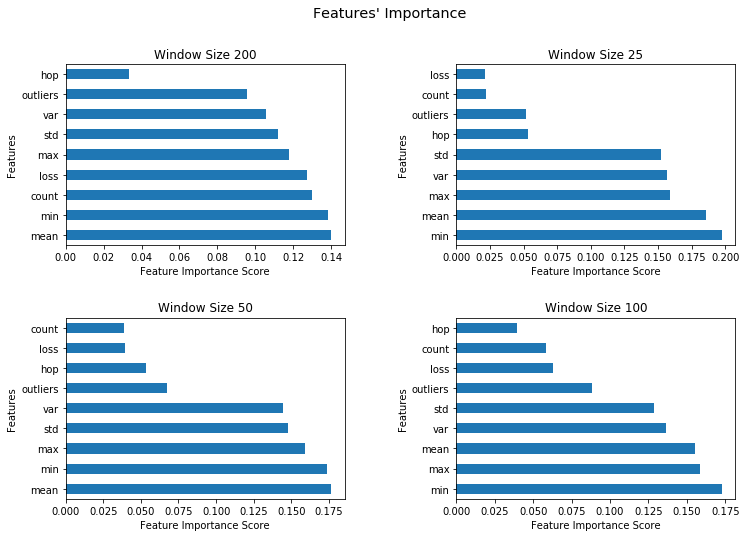

In [20]:
plots_analysis.random_forests_features_selection(trace_stats)

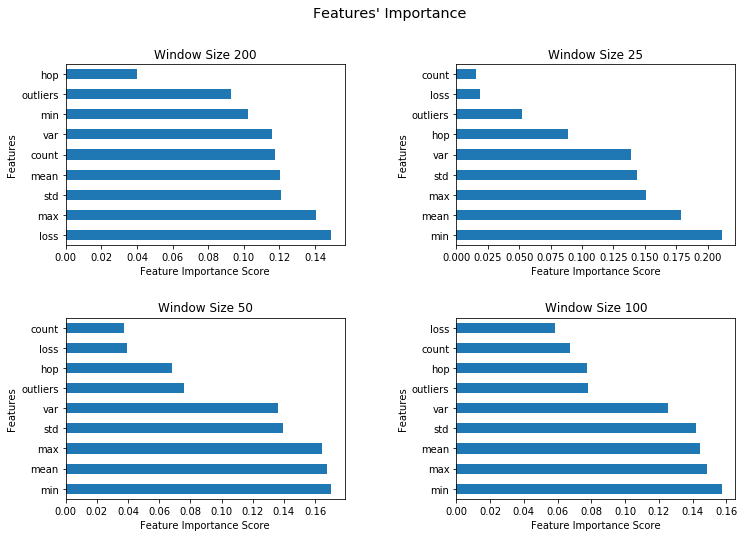

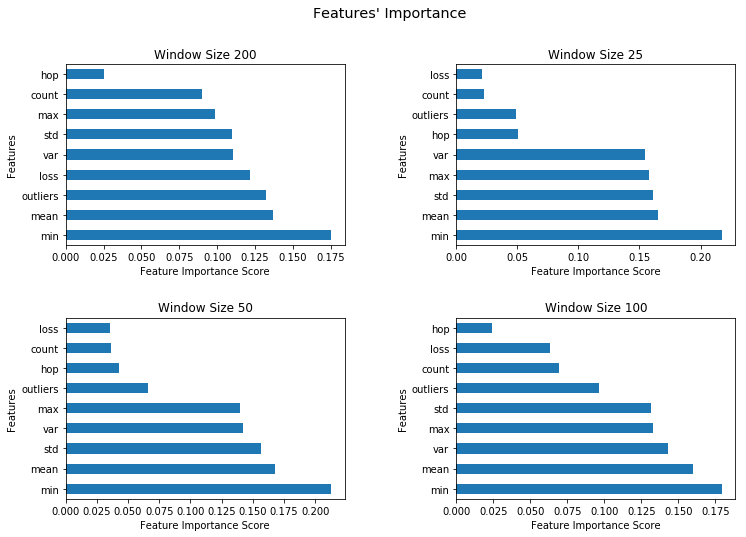

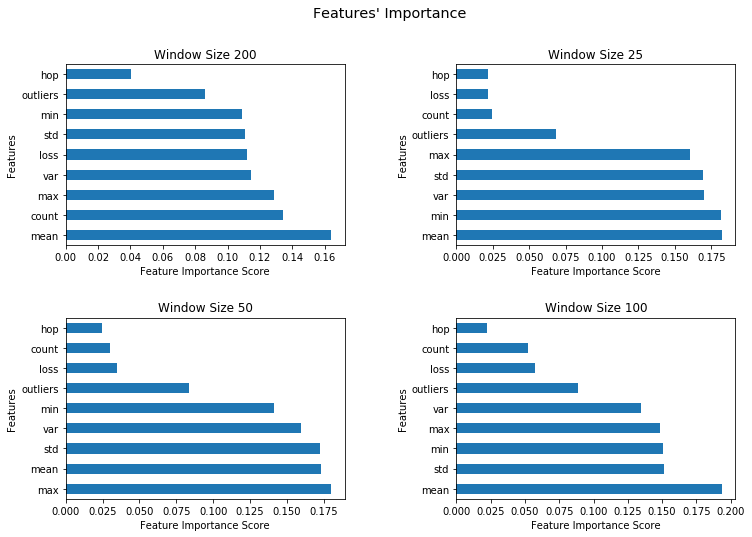

In [21]:
plots_analysis.random_forests_features_selection(plot_trace_stats)
plots_analysis.random_forests_features_selection(rnd1_trace_stats)
plots_analysis.random_forests_features_selection(rnd2_trace_stats)

In [22]:
results = None            # Results from each classification algorithm
cv_results = None         # Cross validation results from each classification algorithm
net_results = None            # Results from each classification algorithm
cv_net_results = None         # Cross validation results from each classification algorithm

features_to_drop = ['node_id', 'experiment', 'label', 'loss', 'count', 'outliers']
net_features_to_drop = ['experiment', 'label']

In [23]:
plot_results = None            # Results from each classification algorithm
plot_cv_results = None         # Cross validation results from each classification algorithm
plot_net_results = None            # Results from each classification algorithm
plot_cv_net_results = None         # Cross validation results from each classification algorithm

rnd1_results = None            # Results from each classification algorithm
rnd1_cv_results = None         # Cross validation results from each classification algorithm
rnd1_net_results = None            # Results from each classification algorithm
rnd1_cv_net_results = None         # Cross validation results from each classification algorithm

rnd2_results = None            # Results from each classification algorithm
rnd2_cv_results = None         # Cross validation results from each classification algorithm
rnd2_net_results = None            # Results from each classification algorithm
rnd2_cv_net_results = None         # Cross validation results from each classification algorithm

# Random Forests Classifier

Let us experiment with random forests. First, let us select most relevant features.

In [24]:
results = pd.concat([results, 
                     trace_classification.random_forest_classification(trace_stats, features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [25]:
plot_results = pd.concat([plot_results, 
                     trace_classification.random_forest_classification(plot_trace_stats, features_to_drop)
                    ])
rnd1_results = pd.concat([rnd1_results, 
                     trace_classification.random_forest_classification(rnd1_trace_stats, features_to_drop)
                    ])
rnd2_results = pd.concat([rnd2_results, 
                     trace_classification.random_forest_classification(rnd2_trace_stats, features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


We want to compute average accuracy for each trace size (i.e. for each window size from 200 - the entire window - to 100, 50 and 25)

In [26]:
cv_results = pd.concat([cv_results, 
                     trace_classification.random_forest_cross_validation(trace_stats, features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [27]:
plot_cv_results = pd.concat([plot_cv_results, 
                     trace_classification.random_forest_cross_validation(plot_trace_stats, features_to_drop)
                    ])

rnd1_cv_results = pd.concat([rnd1_cv_results, 
                     trace_classification.random_forest_cross_validation(rnd1_trace_stats, features_to_drop)
                    ])

rnd2_cv_results = pd.concat([rnd2_cv_results, 
                     trace_classification.random_forest_cross_validation(rnd2_trace_stats, features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Let's do the same for the whole network

In [28]:
net_results = pd.concat([net_results, 
                     trace_classification.random_forest_classification(network_stats, net_features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [29]:
plot_net_results = pd.concat([plot_net_results, 
                     trace_classification.random_forest_classification(plot_network_stats, net_features_to_drop)
                    ])

rnd1_net_results = pd.concat([rnd1_net_results, 
                     trace_classification.random_forest_classification(rnd1_network_stats, net_features_to_drop)
                    ])

rnd2_net_results = pd.concat([rnd2_net_results, 
                     trace_classification.random_forest_classification(rnd2_network_stats, net_features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Cross validation

In [30]:
cv_net_results = pd.concat([cv_net_results, 
                     trace_classification.random_forest_cross_validation(network_stats, net_features_to_drop, cross_val=3)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [31]:
plot_cv_net_results = pd.concat([plot_cv_net_results, 
                     trace_classification.random_forest_cross_validation(plot_network_stats, net_features_to_drop, cross_val=3)
                    ])

rnd1_cv_net_results = pd.concat([rnd1_cv_net_results, 
                     trace_classification.random_forest_cross_validation(rnd1_network_stats, net_features_to_drop, cross_val=3)
                    ])

rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, 
                     trace_classification.random_forest_cross_validation(rnd2_network_stats, net_features_to_drop, cross_val=3)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


# K-Nearest Neighbor (KNN) Classification

Let us first observe the accuracies for different values of k

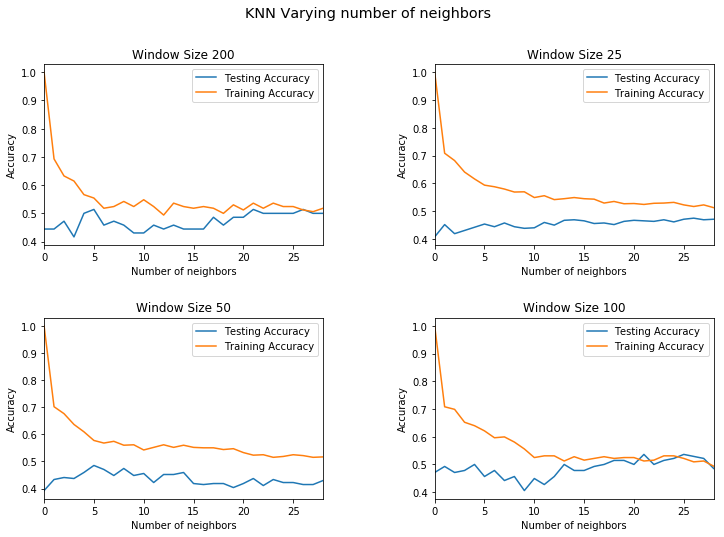

In [32]:
plots_analysis.knn_test_number_of_neighbors(trace_stats, 30)

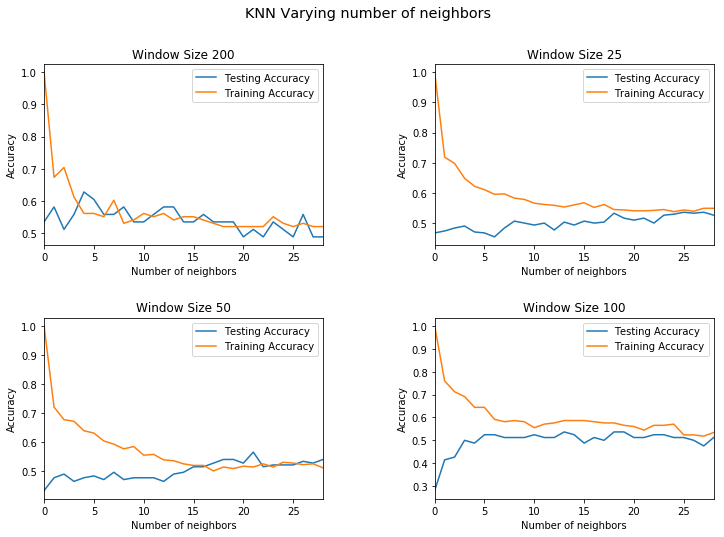

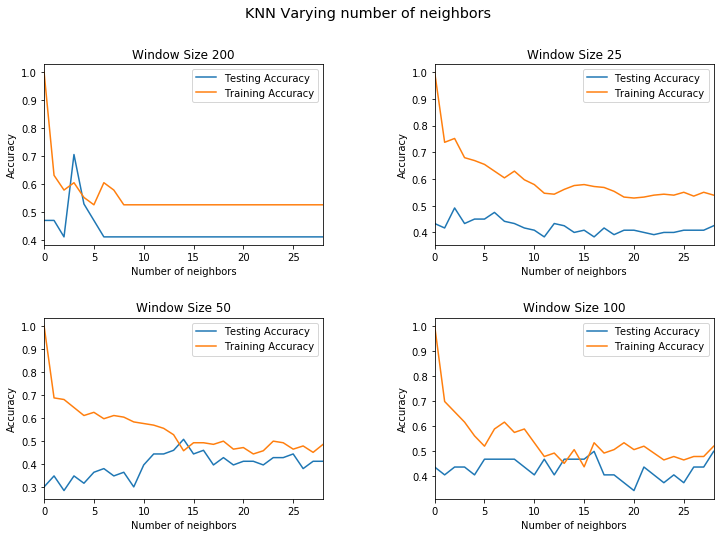

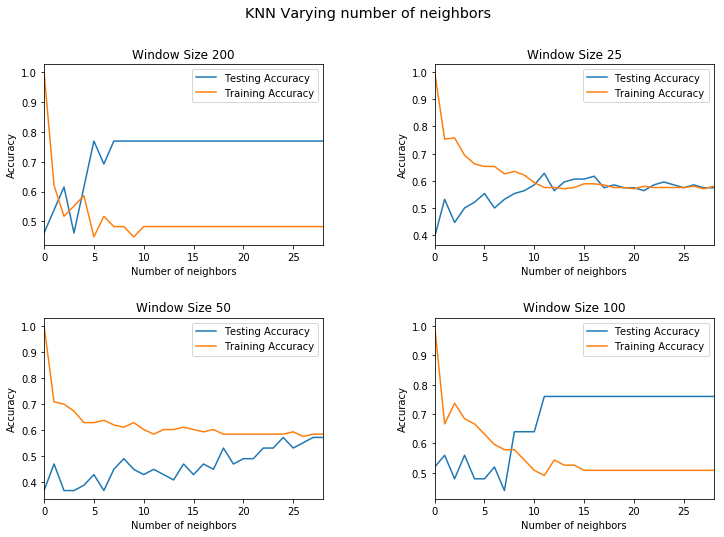

In [33]:
plots_analysis.knn_test_number_of_neighbors(plot_trace_stats, 30)
plots_analysis.knn_test_number_of_neighbors(rnd1_trace_stats, 30)
plots_analysis.knn_test_number_of_neighbors(rnd2_trace_stats, 30)

Let's build KNN classifier 

In [24]:
results = pd.concat([results, 
                     trace_classification.k_nearest_neighbor_classification(trace_stats, features_to_drop, n_neighbors=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [25]:
plot_results = pd.concat([plot_results, 
                     trace_classification.k_nearest_neighbor_classification(plot_trace_stats, features_to_drop, n_neighbors=14)
                    ])

rnd1_results = pd.concat([rnd1_results, 
                     trace_classification.k_nearest_neighbor_classification(rnd1_trace_stats, features_to_drop, n_neighbors=17)
                    ])

'''rnd2_results = pd.concat([rnd2_results, 
                     trace_classification.k_nearest_neighbor_classification(rnd2_trace_stats, features_to_drop, n_neighbors=30)
                    ])'''

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


'rnd2_results = pd.concat([rnd2_results, \n                     trace_classification.k_nearest_neighbor_classification(rnd2_trace_stats, features_to_drop, n_neighbors=30)\n                    ])'

We want to compute average accuracy for each trace size (i.e. for each window size from 200 - the entire window - to 100, 50 and 25)

In [26]:
cv_results = pd.concat([cv_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(trace_stats, features_to_drop, n_neighbors=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [27]:
plot_cv_results = pd.concat([plot_cv_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(plot_trace_stats, features_to_drop, n_neighbors=14)
                    ])

rnd1_cv_results = pd.concat([rnd1_cv_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(rnd1_trace_stats, features_to_drop, n_neighbors=17)
                    ])

rnd2_cv_results = pd.concat([rnd2_cv_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(rnd2_trace_stats, features_to_drop, n_neighbors=30)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Let's do the same for the whole network

In [28]:
net_results = pd.concat([net_results, 
                     trace_classification.k_nearest_neighbor_classification(network_stats, net_features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [29]:
plot_net_results = pd.concat([plot_net_results, 
                     trace_classification.k_nearest_neighbor_classification(plot_network_stats, net_features_to_drop)
                    ])

rnd1_net_results = pd.concat([rnd1_net_results, 
                     trace_classification.k_nearest_neighbor_classification(rnd1_network_stats, net_features_to_drop)
                    ])

rnd2_net_results = pd.concat([rnd2_net_results, 
                     trace_classification.k_nearest_neighbor_classification(rnd2_network_stats, net_features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Cross validation

In [30]:
cv_net_results = pd.concat([cv_net_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(network_stats, net_features_to_drop, cross_val=3)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [31]:
plot_cv_net_results = pd.concat([plot_cv_net_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(plot_network_stats, net_features_to_drop, cross_val=3)
                    ])

rnd1_cv_net_results = pd.concat([rnd1_cv_net_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(rnd1_network_stats, net_features_to_drop, cross_val=3)
                    ])

rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, 
                     trace_classification.k_nearest_neighbor_cross_validation(rnd2_network_stats, net_features_to_drop, cross_val=3, n_neighbors = 2)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


# Support Vector Machines (SVM) Classification

Let us experiment with another classifier

In [32]:
results = pd.concat([results, 
                     trace_classification.support_vector_machines_classification(trace_stats, features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [33]:
plot_results = pd.concat([plot_results, 
                     trace_classification.support_vector_machines_classification(plot_trace_stats, features_to_drop, kernel='rbf')
                    ])

rnd1_results = pd.concat([rnd1_results, 
                     trace_classification.support_vector_machines_classification(rnd1_trace_stats, features_to_drop, kernel='rbf')
                    ])

rnd2_results = pd.concat([rnd2_results, 
                     trace_classification.support_vector_machines_classification(rnd2_trace_stats, features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


We want to compute average accuracy for each trace size (i.e. for each window size from 200 - the entire window - to 100, 50 and 25)

In [34]:
cv_results = pd.concat([cv_results, 
                     trace_classification.support_vector_machines_cross_validation(trace_stats, features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [35]:
plot_cv_results = pd.concat([plot_cv_results, 
                     trace_classification.support_vector_machines_cross_validation(plot_trace_stats, features_to_drop, kernel='rbf')
                    ])

rnd1_cv_results = pd.concat([rnd1_cv_results, 
                     trace_classification.support_vector_machines_cross_validation(rnd1_trace_stats, features_to_drop, kernel='rbf')
                    ])

rnd2_cv_results = pd.concat([rnd2_cv_results, 
                     trace_classification.support_vector_machines_cross_validation(rnd2_trace_stats, features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Let's do the same for the whole network

In [36]:
net_results = pd.concat([net_results, 
                     trace_classification.support_vector_machines_classification(network_stats, net_features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [37]:
plot_net_results = pd.concat([plot_net_results, 
                     trace_classification.support_vector_machines_classification(plot_network_stats, net_features_to_drop, kernel='rbf')
                    ])

rnd1_net_results = pd.concat([rnd1_net_results, 
                     trace_classification.support_vector_machines_classification(rnd1_network_stats, net_features_to_drop, kernel='rbf')
                    ])

rnd2_net_results = pd.concat([rnd2_net_results, 
                     trace_classification.support_vector_machines_classification(rnd2_network_stats, net_features_to_drop, kernel='rbf')
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Cross validation

In [38]:
cv_net_results = pd.concat([cv_net_results, 
                     trace_classification.support_vector_machines_cross_validation(network_stats, net_features_to_drop, cross_val=3)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [39]:
plot_cv_net_results = pd.concat([plot_cv_net_results, 
                     trace_classification.support_vector_machines_cross_validation(plot_network_stats, net_features_to_drop, cross_val=3)
                    ])

rnd1_cv_net_results = pd.concat([rnd1_cv_net_results, 
                     trace_classification.support_vector_machines_cross_validation(rnd1_network_stats, net_features_to_drop, cross_val=3)
                    ])

'''rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, 
                     trace_classification.support_vector_machines_cross_validation(rnd2_network_stats, net_features_to_drop, cross_val=3)
                    ])'''

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


'rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, \n                     trace_classification.support_vector_machines_cross_validation(rnd2_network_stats, net_features_to_drop, cross_val=3)\n                    ])'

# One Vs The Rest Classifier

SVM performs really well, but it is slow. Now we try to implement it in a most efficient way. The strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes

In [40]:
results = pd.concat([results, 
                     trace_classification.ensalble_svm_classification(trace_stats, features_to_drop, n_estimators=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [41]:
plot_results = pd.concat([plot_results, 
                     trace_classification.ensalble_svm_classification(plot_trace_stats, features_to_drop, n_estimators=15)
                    ])

rnd1_results = pd.concat([rnd1_results, 
                     trace_classification.ensalble_svm_classification(rnd1_trace_stats, features_to_drop, n_estimators=15)
                    ])

rnd2_results = pd.concat([rnd2_results, 
                     trace_classification.ensalble_svm_classification(rnd2_trace_stats, features_to_drop, n_estimators=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Cross validate

In [42]:
cv_results = pd.concat([cv_results, 
                     trace_classification.ensalble_svm_cross_validation(trace_stats, features_to_drop, n_estimators=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [43]:
plot_cv_results = pd.concat([plot_cv_results, 
                     trace_classification.ensalble_svm_cross_validation(plot_trace_stats, features_to_drop, n_estimators=15)
                    ])

rnd1_cv_results = pd.concat([rnd1_cv_results, 
                     trace_classification.ensalble_svm_cross_validation(rnd1_trace_stats, features_to_drop, n_estimators=15)
                    ])

rnd2_cv_results = pd.concat([rnd2_cv_results, 
                     trace_classification.ensalble_svm_cross_validation(rnd2_trace_stats, features_to_drop, n_estimators=15)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100
Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


Let's do the same for the whole network

In [44]:
net_results = pd.concat([net_results, 
                     trace_classification.ensalble_svm_classification(network_stats, net_features_to_drop)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [45]:
plot_net_results = pd.concat([plot_net_results, 
                     trace_classification.ensalble_svm_classification(plot_network_stats, net_features_to_drop)
                    ])

'''rnd1_net_results = pd.concat([rnd1_net_results, 
                     trace_classification.ensalble_svm_classification(rnd1_network_stats, net_features_to_drop)
                    ])

rnd2_net_results = pd.concat([rnd2_net_results, 
                     trace_classification.ensalble_svm_classification(rnd2_network_stats, net_features_to_drop)
                    ])'''

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


'rnd1_net_results = pd.concat([rnd1_net_results, \n                     trace_classification.ensalble_svm_classification(rnd1_network_stats, net_features_to_drop)\n                    ])\n\nrnd2_net_results = pd.concat([rnd2_net_results, \n                     trace_classification.ensalble_svm_classification(rnd2_network_stats, net_features_to_drop)\n                    ])'

Cross validation

In [46]:
cv_net_results = pd.concat([cv_net_results, 
                     trace_classification.ensalble_svm_cross_validation(network_stats, net_features_to_drop, cross_val=3)
                    ])

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


In [47]:
plot_cv_net_results = pd.concat([plot_cv_net_results, 
                     trace_classification.ensalble_svm_cross_validation(plot_network_stats, net_features_to_drop)
                    ])

'''rnd1_cv_net_results = pd.concat([rnd1_cv_net_results, 
                     trace_classification.ensalble_svm_cross_validation(rnd1_network_stats, net_features_to_drop)
                    ])'''


'''rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, 
                     trace_classification.ensalble_svm_cross_validation(rnd2_network_stats, net_features_to_drop)
                    ])'''

Computing trace 200
Computing trace 25
Computing trace 50
Computing trace 100


'rnd2_cv_net_results = pd.concat([rnd2_cv_net_results, \n                     trace_classification.ensalble_svm_cross_validation(rnd2_network_stats, net_features_to_drop)\n                    ])'

# Per Node Results

Results for each model

In [48]:
results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.472222,0.437057,0.408263,0.392813,0.064097,0.006082
1,Random Forest,25,0.475000,0.403887,0.394385,0.386698,0.207044,0.012297
2,Random Forest,50,0.462963,0.429342,0.394534,0.391692,0.122575,0.008714
3,Random Forest,100,0.485507,0.467157,0.448509,0.455408,0.082373,0.006982
4,KNN,200,0.458333,0.293290,0.385714,0.332982,0.000819,0.004062
5,KNN,25,0.482692,0.418857,0.378302,0.361990,0.001689,0.012487
6,KNN,50,0.422222,0.384728,0.347489,0.335496,0.001174,0.006984
7,KNN,100,0.434783,0.506944,0.375316,0.391597,0.001003,0.003995
8,SVM,200,0.430556,0.304113,0.402381,0.325562,0.003972,0.000864
9,SVM,25,0.498077,0.350873,0.345019,0.249222,0.039725,0.009649


In [49]:
plot_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.465116,0.549309,0.480556,0.428406,0.055585,0.005748
1,Random Forest,25,0.519608,0.461111,0.438793,0.439714,0.135053,0.009287
2,Random Forest,50,0.490566,0.433178,0.412516,0.409373,0.087019,0.007410
3,Random Forest,100,0.463415,0.378148,0.377859,0.372089,0.065053,0.006337
4,KNN,200,0.395349,0.533784,0.380556,0.316667,0.000791,0.001829
5,KNN,25,0.519608,0.486926,0.419632,0.415580,0.001197,0.007784
6,KNN,50,0.415094,0.416937,0.343279,0.342685,0.000882,0.004341
7,KNN,100,0.487805,0.368542,0.366422,0.360860,0.000770,0.004219
8,SVM,200,0.325581,0.111111,0.311111,0.163743,0.001770,0.000563
9,SVM,25,0.500000,0.343872,0.366872,0.292777,0.014070,0.003673


In [50]:
rnd1_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.588235,0.734848,0.587302,0.600119,0.050362,0.005641
1,Random Forest,25,0.500000,0.537323,0.465945,0.481775,0.072625,0.008026
2,Random Forest,50,0.476190,0.522222,0.444284,0.455968,0.058566,0.005970
3,Random Forest,100,0.375000,0.281481,0.300000,0.290196,0.053282,0.005940
4,KNN,200,0.352941,0.117647,0.333333,0.173913,0.000675,0.001633
5,KNN,25,0.450000,0.299592,0.376188,0.333132,0.000928,0.003681
6,KNN,50,0.412698,0.267554,0.343434,0.297683,0.000752,0.003276
7,KNN,100,0.375000,0.148148,0.250000,0.186047,0.000702,0.002210
8,SVM,200,0.411765,0.458333,0.380952,0.265152,0.000902,0.000485
9,SVM,25,0.475000,0.384848,0.368729,0.292549,0.004178,0.001053


In [51]:
rnd2_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.307692,0.148148,0.166667,0.156863,0.049208,0.005418
1,Random Forest,25,0.542553,0.529531,0.447260,0.451297,0.067848,0.007357
2,Random Forest,50,0.489796,0.380952,0.398268,0.341667,0.057492,0.005998
3,Random Forest,100,0.480000,0.173913,0.307692,0.222222,0.051644,0.005724
4,SVM,200,0.615385,0.307692,0.500000,0.380952,0.000890,0.000481
5,SVM,25,0.531915,0.177305,0.333333,0.231481,0.002081,0.000706
6,SVM,50,0.448980,0.149660,0.333333,0.206573,0.001286,0.000569
7,SVM,100,0.520000,0.173333,0.333333,0.228070,0.000915,0.000461
8,OneVsRestClassifier (SVM),200,0.538462,0.375000,0.341667,0.356481,0.339292,0.003766
9,OneVsRestClassifier (SVM),25,0.404255,0.212482,0.280952,0.241966,2.581765,0.003623


Here we plot the average results for each model

In [52]:
cv_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.373037
1,Random Forest,25,0.430338
2,Random Forest,50,0.413392
3,Random Forest,100,0.430145
4,KNN,200,0.364615
5,KNN,25,0.415819
6,KNN,50,0.422430
7,KNN,100,0.445458
8,SVM,200,0.428182
9,SVM,25,0.483552


In [53]:
plot_cv_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.510108
1,Random Forest,25,0.488144
2,Random Forest,50,0.514953
3,Random Forest,100,0.494222
4,KNN,200,0.473901
5,KNN,25,0.473538
6,KNN,50,0.458256
7,KNN,100,0.487476
8,SVM,200,0.402892
9,SVM,25,0.499014


In [54]:
rnd1_cv_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.451010
1,Random Forest,25,0.399411
2,Random Forest,50,0.463528
3,Random Forest,100,0.387703
4,KNN,200,0.420707
5,KNN,25,0.389943
6,KNN,50,0.391946
7,KNN,100,0.409665
8,SVM,200,0.426263
9,SVM,25,0.447044


In [55]:
rnd2_cv_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.388889
1,Random Forest,25,0.460265
2,Random Forest,50,0.443330
3,Random Forest,100,0.499085
4,KNN,200,0.577778
5,KNN,25,0.546500
6,KNN,50,0.545251
7,KNN,100,0.586405
8,SVM,200,0.577778
9,SVM,25,0.562477


# Network Results
Here we print the results from each model on the whole network

In [56]:
net_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.444444,0.533333,0.311111,0.366667,0.051605,0.005522
1,Random Forest,25,0.500000,0.166667,0.333333,0.222222,0.052411,0.005819
2,Random Forest,50,0.416667,0.316092,0.318452,0.266667,0.049391,0.005535
3,Random Forest,100,0.500000,0.434343,0.370370,0.381481,0.051379,0.005432
4,KNN,200,0.444444,0.283333,0.533333,0.333333,0.000724,0.001385
5,KNN,25,0.500000,0.166667,0.333333,0.222222,0.001156,0.004674
6,KNN,50,0.472222,0.485714,0.357143,0.253595,0.000709,0.002558
7,KNN,100,0.166667,0.100000,0.111111,0.105263,0.000675,0.001663
8,SVM,200,0.555556,0.476190,0.466667,0.390476,0.000838,0.000524
9,SVM,25,0.500000,0.166667,0.333333,0.222222,0.001314,0.000619


In [57]:
plot_net_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.500000,0.200000,0.250000,0.222222,0.050078,0.005445
1,Random Forest,25,0.613636,0.204545,0.333333,0.253521,0.049178,0.005637
2,Random Forest,50,0.409091,0.150000,0.272727,0.193548,0.047731,0.005457
3,Random Forest,100,0.272727,0.194444,0.277778,0.195286,0.048070,0.005376
4,KNN,200,0.333333,0.666667,0.250000,0.355556,0.000711,0.001748
5,KNN,25,0.613636,0.204545,0.333333,0.253521,0.000751,0.003160
6,KNN,50,0.454545,0.303030,0.329966,0.315152,0.000688,0.001689
7,KNN,100,0.272727,0.090909,0.333333,0.142857,0.000756,0.001663
8,SVM,200,0.666667,0.333333,0.500000,0.400000,0.000933,0.000486
9,SVM,25,0.613636,0.204545,0.333333,0.253521,0.001042,0.000506


In [58]:
rnd1_net_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.000000,0.000000,0.000000,0.000000,0.047603,0.005401
1,Random Forest,25,0.411765,0.444444,0.400000,0.277778,0.047517,0.005702
2,Random Forest,50,0.222222,0.214286,0.222222,0.157407,0.046525,0.005369
3,Random Forest,100,0.400000,0.200000,0.500000,0.285714,0.046589,0.005319
4,KNN,200,0.000000,0.000000,0.000000,0.000000,0.000618,0.001130
5,KNN,25,0.529412,0.187500,0.300000,0.230769,0.000849,0.001623
6,KNN,50,0.222222,0.074074,0.333333,0.121212,0.000682,0.001360
7,KNN,100,0.400000,0.200000,0.500000,0.285714,0.000668,0.001033
8,SVM,200,0.000000,0.000000,0.000000,0.000000,0.000806,0.000439
9,SVM,25,0.411765,0.444444,0.400000,0.277778,0.000839,0.000460


In [59]:
rnd2_net_results.reset_index(drop=True)

,Model,Window Size,Accuracy,Precision,Recall,F1-score,Training Time (sec),Testing Time (sec)
0,Random Forest,200,0.000000,0.000000,0.000000,0.000000,0.048717,0.005389
1,Random Forest,25,0.583333,0.233333,0.291667,0.259259,0.047516,0.005560
2,Random Forest,50,0.500000,0.250000,0.333333,0.285714,0.047315,0.005491
3,Random Forest,100,0.666667,0.333333,0.500000,0.400000,0.048011,0.005397
4,KNN,200,1.000000,1.000000,1.000000,1.000000,0.000576,0.000895
5,KNN,25,0.083333,0.030303,0.166667,0.051282,0.000669,0.001347
6,KNN,50,0.500000,0.166667,0.333333,0.222222,0.000659,0.001067
7,KNN,100,0.666667,0.333333,0.500000,0.400000,0.000574,0.000957
8,SVM,200,0.000000,0.000000,0.000000,0.000000,0.000653,0.000417
9,SVM,25,0.666667,0.242424,0.333333,0.280702,0.000797,0.000470


Here we plot the average results for each model computed with cross validation

In [60]:
cv_net_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.594276
1,Random Forest,25,0.495888
2,Random Forest,50,0.541693
3,Random Forest,100,0.550042
4,KNN,200,0.527609
5,KNN,25,0.504170
6,KNN,50,0.500005
7,KNN,100,0.533375
8,SVM,200,0.601010
9,SVM,25,0.500003


In [61]:
plot_cv_net_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.490476
1,Random Forest,25,0.549057
2,Random Forest,50,0.486087
3,Random Forest,100,0.474553
4,KNN,200,0.509524
5,KNN,25,0.548768
6,KNN,50,0.542295
7,KNN,100,0.527972
8,SVM,200,0.557143
9,SVM,25,0.555571


In [62]:
rnd1_cv_net_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.111111
1,Random Forest,25,0.318713
2,Random Forest,50,0.281481
3,Random Forest,100,0.283333
4,KNN,200,0.444444
5,KNN,25,0.410331
6,KNN,50,0.392593
7,KNN,100,0.366667
8,SVM,200,0.611111
9,SVM,25,0.428850


In [63]:
rnd2_cv_net_results.reset_index(drop=True)

,Model,Window Size,Mean Accuracy
0,Random Forest,200,0.777778
1,Random Forest,25,0.607143
2,Random Forest,50,0.611111
3,Random Forest,100,0.500000
4,KNN,200,0.444444
5,KNN,25,0.297619
6,KNN,50,0.722222
7,KNN,100,0.666667
